## marketcap

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import boto3
from botocore.client import Config
import os
import pandas as pd
from io import StringIO
import matplotlib.dates as dates
from datetime import datetime
import matplotlib.ticker as ticker

os.chdir('C:\\Users\\A Sua\\Documents\\AWS\\credentials')
list_of_lines = []
with open('capstoner_key.txt') as fp:
    lines = fp.readlines()
    for line in lines:
        line = line.strip()
        list_of_lines.append(line)
    fp.close()


location = list_of_lines[0].split('=')[1]
AWS_ACCESS_KEY_ID = list_of_lines[1].split('=')[1]
AWS_SECRET_ACCESS_KEY = list_of_lines[2].split('=')[1]
os.chdir('C:\\Users\\A Sua\\Documents\\FIU\\CAP2020')

### import marketcap

In [2]:
### BUCKETS & KEYS
BUCKET_NAME = 'capstonefiu2020-data'
key_location = 'data/processed'
file_name = 'df_market_cap.csv'
key_path = key_location + '/' + file_name

### ACTIVATE CLIENT
client = boto3.client('s3', 
              aws_access_key_id = AWS_ACCESS_KEY_ID,
               aws_secret_access_key=AWS_SECRET_ACCESS_KEY)


### INSTANTIATE DATAFRAME
csv_obj = client.get_object(Bucket = BUCKET_NAME, Key=key_path)
body = csv_obj['Body']
csv_string = body.read().decode('utf-8')

df_marketcap = pd.read_csv(StringIO(csv_string))
df_marketcap.index = df_marketcap['Unnamed: 0']
df_marketcap = df_marketcap.drop('Unnamed: 0', axis=1)
df_marketcap.index.names = ['date']


#df_bidlo.head()
#### TRANSPOSE DATA FOR EASE OF USE
df_marketcap = df_marketcap.T
df_marketcap.index = pd.to_datetime(df_marketcap.index)
df_marketcap.head()

date,ORCL_ORACLE CORP,MSFT_MICROSOFT CORP,TROW_T ROWE PRICE GROUP INC,HON_HONEYWELL INTERNATIONAL INC,ADM_ARCHER DANIELS MIDLAND CO,FISV_FISERV INC,CERN_CERNER CORP,KO_COCA COLA CO,CDNS_CADENCE DESIGN SYSTEMS INC,ED_CONSOLIDATED EDISON INC,...,NWS_NEWS CORP,UA_UNDER ARMOUR INC,MKC_MCCORMICK & CO INC,LEN_LENNAR CORP,TAP_MOLSON COORS BREWING CO,STZ_CONSTELLATION BRANDS INC,CBS_CBS CORP,DVA_DAVITA,PLD_PROLOGIS TRUST,CMG_CHIPOTLE MEXICAN GRILL INC
2007-01-03,90740164.41,291941220.0,12121920.0,36824601.0,21071306.76,8823162.87,3543318.40,1.138616e+08,4989652.80,12426261.66,...,183827915.0,42955605.0,29660400.0,198515110.0,77596878.0,72954170.0,101949133.0,40158430.0,103539930.0,29574135.0
2007-01-04,91621136.88,291452370.0,12227904.0,36808270.8,20953002.48,9009652.06,3645228.00,1.139085e+08,4953914.24,12405718.14,...,203099690.0,19955535.6,22532046.0,102835600.0,60574689.0,243392660.0,126551630.0,29452725.0,56377008.0,26622800.0
2007-01-05,91413849.24,289790280.0,12204057.6,36457171.5,20920140.18,8975433.86,3563700.32,1.131116e+08,4964910.72,12231098.22,...,121661049.0,31521636.0,17843672.0,94974070.0,39326140.0,180328596.0,203481420.0,27211224.0,67667656.0,28329984.0
2007-01-08,92553931.26,292625610.0,12426624.0,36677629.2,21025299.54,8997675.69,3551157.60,1.138382e+08,4956663.36,12213122.64,...,113811192.0,22017886.0,26010980.0,97796748.0,44290400.0,76248780.0,97447320.0,27876366.0,111984950.0,16101300.0
2007-01-09,92346643.62,292918920.0,12476966.4,36938912.4,20512647.66,9025050.25,3554293.28,1.139319e+08,4984154.56,12249073.80,...,115748960.0,20202700.0,22747176.0,63655956.0,36005200.0,44021780.0,101806835.0,72708450.0,107887990.0,32804124.0


In [ ]:
key_list = df_marketcap.columns

for company in key_list[:20]:
    fig, ax = plt.subplots()
    ax.hist(df_marketcap[company])
    plt.xticks(rotation=45)
    plt.title('{}:\nMarketcap: 2000-2019'.format(company), fontsize=15)
    plt.show()
    print('')
    print('')

### CREATE MARKET CAP CATEGORIES BY QUINTILE BUCKETS

In [164]:
# print(df_market_cap['2007-01-03'].describe()['min'])
# print(df_market_cap['2007-01-03'].describe()['25%'])
# print(df_market_cap['2007-01-03'].describe()['50%'])
# print(df_market_cap['2007-01-03'].describe()['75%'])
# print(df_market_cap['2007-01-03'].describe()['max'])

In [5]:
print(pd.qcut(df_marketcap.T['2007-01-03'], q=[0, .25, .5, .75, 1.], precision=3).value_counts())
print(pd.qcut(df_marketcap.T['2010-01-04'], q=[0, .25, .5, .75, 1.], precision=3).value_counts())
print(pd.qcut(df_marketcap.T['2018-12-31'], q=[0, .25, .5, .75, 1.], precision=3).value_counts())

(64448.699, 4552482.0]        102
(23801140.0, 432245685.68]    101
(11081810.88, 23801140.0]     101
(4552482.0, 11081810.88]      101
Name: 2007-01-03 00:00:00, dtype: int64
(20162.879, 4268324.13]       106
(22257955.43, 327210746.7]    105
(8872425.96, 22257955.43]     105
(4268324.13, 8872425.96]      105
Name: 2010-01-04 00:00:00, dtype: int64
(11216.701, 10837948.08]      126
(42637946.0, 779673563.83]    125
(18506408.05, 42637946.0]     125
(10837948.08, 18506408.05]    125
Name: 2018-12-31 00:00:00, dtype: int64


AttributeError: 'XAxis' object has no attribute 'limit'

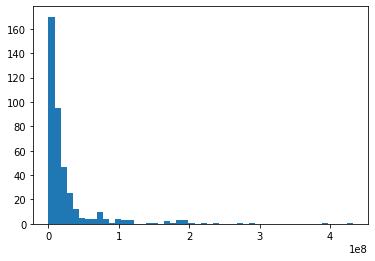

In [16]:
fig, ax = plt.subplots()
ax.hist(df_marketcap.T['2007-01-03'], bins=50)
ax.xaxis.limit(0, 20)
plt.show()